In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np

# Generate some data:

In [2]:
from batchglm.api.models.nb_glm import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0, num_confounders=2)
# sample parameters from positive truncated N(1, 0.1)
mu=1; phi=0.1
sim.generate_params(rand_fn_loc=lambda size: mu + scipy.stats.truncnorm.rvs(-mu / phi, np.infty, scale=phi, size=size))
sim.generate_data()

# count data
X = sim.X
# sample description
sample_description = sim.sample_description

The sample description should be a pandas DataFrame with `num_observations` rows.
Each column should represent a property of the dataset.

The module `batchglm.api.data` contains some helper functions which can be useful to create this sample description:

- `sample_description_from_anndata()`
- `sample_description_from_xarray()`

In [3]:
sample_description

,condition
observations,
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,0


# Run differential expression test:

The t-test checks if two groups of samples differ significantly in one gene.

Therefore, it has to be provided with a parameter `grouping` which specifies the group membership of each sample.
It can be either the name of a column in `sample_description` or a vector of length `num_observations`.


In [4]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

import diffxpy as de

test = de.test_t_test(
    data=X,
    grouping="condition",
    sample_description=sample_description
)


# Obtaining the results

The p-/q-values can be obtained by calling test.pval / test.qval:

In [5]:
test.qval

array([  3.16869176e-03,   1.11102101e-08,   4.15027166e-04,
         2.74007086e-06,   7.43964288e-01,   4.68889677e-08,
         0.00000000e+00,   7.97756605e-01,   8.76090472e-01,
         4.91248793e-08,   1.34732898e-02,   1.19744532e-01,
         9.67221624e-10,   1.72625455e-01,   3.17305270e-07,
         8.39623485e-03,   9.72840303e-05,   1.24900541e-05,
         3.30457023e-01,   3.74168581e-05,   7.97756605e-01,
         1.37782071e-07,   0.00000000e+00,   1.70803542e-15,
         2.26207941e-13,   4.94785194e-06,   5.46493362e-04,
         0.00000000e+00,   5.04735518e-01,   3.18758055e-01,
         4.68635942e-01,   0.00000000e+00,   5.05007387e-03,
         1.28157696e-07,   8.27246963e-01,   9.18416508e-01,
         9.41106588e-04,   2.17514885e-01,   3.08798700e-01,
         0.00000000e+00,   4.65146031e-04,   1.64959030e-03,
         7.97756605e-01,   6.86737875e-01,   3.44907067e-03,
         9.14324061e-08,   7.31154658e-01,   2.00754446e-12,
         5.07719548e-01,

test.summary() returns a pandas DataFrame with a quick overview of the test results:

In [6]:
test.summary()

,gene,pval,qval,log2fc
0,0,1.616033e-03,3.168692e-03,0.126140
1,1,2.333144e-09,1.111021e-08,0.137879
2,2,1.743114e-04,4.150272e-04,-0.217983
3,3,8.768227e-07,2.740071e-06,0.149855
4,4,6.026111e-01,7.439643e-01,-0.011615
5,5,1.125335e-08,4.688897e-08,0.115980
6,6,0.000000e+00,0.000000e+00,-0.241094
7,7,7.100034e-01,7.977566e-01,0.007303
8,8,8.235250e-01,8.760905e-01,-0.004667
9,9,1.228122e-08,4.912488e-08,-0.170452


- `gene`: gene name / identifier
- `pval`: p-value of the gene
- `qval`: multiple testing - corrected p-value of the gene
- `log2fc`: log_2 fold change between `no coefficient` and `coefficient`

`test.plot_volcano()` creates a volcano plot of p-values vs. fold-change:

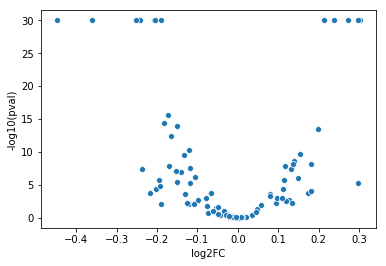

In [7]:
test.plot_volcano()
plt.show()